<a href="https://colab.research.google.com/github/aditipriya25/IPL-Score-prediction/blob/main/IPL_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
832/832 [==============================] - 5s 5ms/step - loss: 32.5884 - val_loss: 22.4365
Epoch 2/50
832/832 [==============================] - 4s 5ms/step - loss: 22.3744 - val_loss: 22.2021
Epoch 3/50
832/832 [==============================] - 4s 5ms/step - loss: 22.3265 - val_loss: 21.9697
Epoch 4/50
832/832 [==============================] - 4s 4ms/step - loss: 22.2678 - val_loss: 21.8825
Epoch 5/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2025 - val_loss: 22.1262
Epoch 6/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1624 - val_loss: 21.8124
Epoch 7/50
832/832 [==============================] - 4s 4ms/step - loss: 22.1369 - val_loss: 22.1489
Epoch 8/50
832/832 [==============================] - 4s 4ms/step - loss: 22.1067 - val_loss: 21.7578
Epoch 9/50
832/832 [==============================] - 5s 6ms/step - loss: 22.0365 - val_loss: 21.9196
Epoch 10/50
832/832 [==============================] - 4s 4ms/step - loss: 22.0670

19.823774867109027

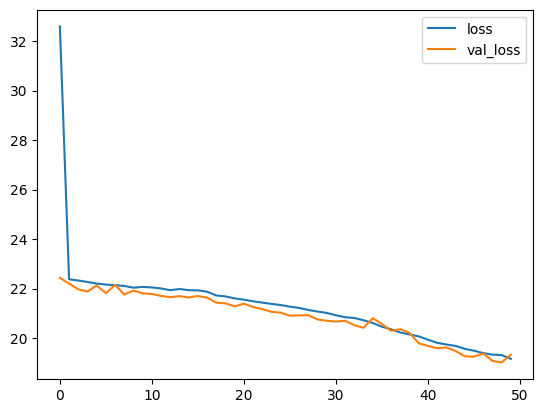

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

ipl = pd.read_csv('/content/ipl_data.csv')
ipl.head()

#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

X = df.drop(['total'], axis =1)
y = df['total']

#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
	keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation
	keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
	keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)






In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your dataset
data = pd.read_csv("/content/ipl_data.csv")
df = data.drop(['runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis=1)

# Assuming 'total' is the target variable
X = df[['runs', 'wickets']]
y_true = df['total']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

# Train your model (Example: Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Obtain predictions from the model
y_pred = model.predict(X_test)

# Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    condition = np.abs(error) < delta
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss)

# Calculate Huber loss
loss = huber_loss(y_test, y_pred)
print("Huber Loss:", loss)


Huber Loss: [ 0.12541387 16.48970817 44.21413901 ...  7.86263283  0.25499727
 16.12722346]


[179.81983771 179.18190882 179.56866391 ... 101.0572762  100.4620371
  94.11722237]
Mean Absolute Error : 11.695460753505193


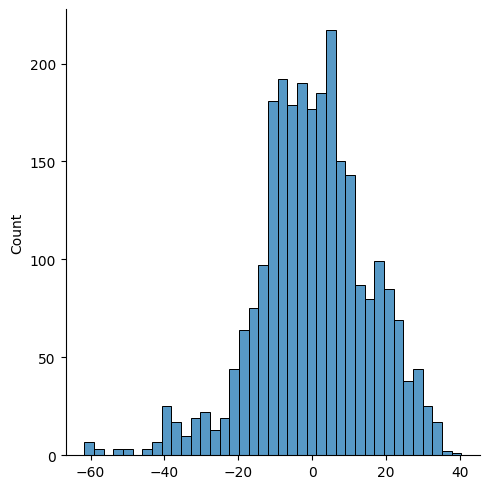

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
ipl_data=pd.read_csv('/content/ipl_data.csv')
ipl_data.shape
ipl_data.head(5)
#removing unwanted columns
column_delete=['mid','venue','batsman','bowler','striker','non-striker']
ipl_data.drop(labels=column_delete,axis=1,inplace=True)
ipl_data.head(5)
[ipl_data['bat_team'].unique()]
current_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
        'Mumbai Indians', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']
ipl_data=ipl_data[(ipl_data['bat_team'].isin(current_team))&(ipl_data['bowl_team'].isin(current_team))]
ipl_data.shape
#Removing First 6 over i.e Powerplay to that we have atleast 6 over data to predict
ipl_data=ipl_data[ipl_data['overs']>=6.0]
ipl_data.head(5)
#Convert Data string to datetime object
from datetime import datetime
ipl_data['date']=ipl_data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
#Data Preprocessing : One Hot Encoding
encoded_ipl=pd.get_dummies(data=ipl_data,columns=['bat_team','bowl_team'])
encoded_ipl.head(5)
#Rearranging Dataset
encoded_ipl.columns
encoded_ipl=encoded_ipl[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
        'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]

x_train=encoded_ipl.drop(labels='total',axis=1)[encoded_ipl['date'].dt.year<=2016]
x_test=encoded_ipl.drop(labels='total',axis=1)[encoded_ipl['date'].dt.year>2016]
y_train=encoded_ipl[encoded_ipl['date'].dt.year<=2016]['total'].values
y_test=encoded_ipl[encoded_ipl['date'].dt.year>2016]['total'].values
#remove date column
x_train.drop(labels='date',axis=True,inplace=True)
x_test.drop(labels='date',axis=True,inplace=True)

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)
import seaborn as sns
sns.displot(y_test-y_pred)
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(LinearRegression, open(filename, 'wb'))
from sklearn import metrics
print('Mean Absolute Error :',(metrics.mean_absolute_error(y_test,y_pred)))